In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
crdc_1516 = pd.read_csv('../filtered_data/00_crdc_1516_initial.csv', 
                        dtype = {'LEAID':np.object})

In [3]:
len(crdc_1516.index)

96360

In [4]:
crdc_1516.columns.values

array(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID',
       'SCH_NAME', 'COMBOKEY', 'JJ', 'SCH_GRADE_PS', 'SCH_GRADE_KG',
       'SCH_GRADE_G01', 'SCH_GRADE_G02', 'SCH_GRADE_G03', 'SCH_GRADE_G04',
       'SCH_GRADE_G05', 'SCH_GRADE_G06', 'SCH_GRADE_G07', 'SCH_GRADE_G08',
       'SCH_GRADE_G09', 'SCH_GRADE_G10', 'SCH_GRADE_G11', 'SCH_GRADE_G12',
       'SCH_GRADE_UG', 'SCH_UGDETAIL_HS', 'SCH_STATUS_SPED',
       'SCH_STATUS_MAGNET', 'SCH_STATUS_CHARTER', 'SCH_STATUS_ALT',
       'SCH_ENR_HI_M', 'SCH_ENR_HI_F', 'SCH_ENR_AM_M', 'SCH_ENR_AM_F',
       'SCH_ENR_AS_M', 'SCH_ENR_AS_F', 'SCH_ENR_HP_M', 'SCH_ENR_HP_F',
       'SCH_ENR_BL_M', 'SCH_ENR_BL_F', 'SCH_ENR_WH_M', 'SCH_ENR_WH_F',
       'SCH_ENR_TR_M', 'SCH_ENR_TR_F', 'TOT_ENR_M', 'TOT_ENR_F',
       'SCH_ENR_LEP_M', 'SCH_ENR_LEP_F', 'SCH_ENR_IDEA_M',
       'SCH_ENR_IDEA_F', 'SCH_DUAL_IND', 'SCH_DUALENR_HI_M',
       'SCH_DUALENR_HI_F', 'SCH_DUALENR_AM_M', 'SCH_DUALENR_AM_F',
       'SCH_DUALENR_AS_M', 'SCH_DUALENR_AS_F

# <font color = green> Clean Missing Values / Add Enrollment columns </font>
Specificially those for int-columns -- these are recorded as negative numbers that interfere with the enrollment calculations.

In [5]:
crdc_1516_cleaned = crdc_1516.copy()

In [6]:
def missing_value_mapper(value):
    if isinstance(value, int):
        if value < 0:
            return 0
    return value

crdc_1516_cleaned = crdc_1516_cleaned.applymap(missing_value_mapper)

<font color = blue>** -- Totals Columns -- **</font>

** Total enrollments **

In [7]:
crdc_1516_cleaned['total_enrollment'] = crdc_1516_cleaned['TOT_ENR_M'] + crdc_1516_cleaned['TOT_ENR_F']

** Total white enrollments **

In [8]:
crdc_1516_cleaned['total_white_enrollment'] = crdc_1516_cleaned['SCH_ENR_WH_M'] + crdc_1516_cleaned['SCH_ENR_WH_F']

** Total non-white enrollments **

In [9]:
crdc_1516_cleaned['total_nonwhite_enrollment'] = crdc_1516_cleaned['total_enrollment'] - crdc_1516_cleaned['total_white_enrollment']

**Total Racial Breakdowns**

In [10]:
crdc_1516_cleaned['total_hi_enrollment'] = crdc_1516_cleaned['SCH_ENR_HI_M'] + crdc_1516_cleaned['SCH_ENR_HI_F']
crdc_1516_cleaned['total_am_enrollment'] = crdc_1516_cleaned['SCH_ENR_AM_M'] + crdc_1516_cleaned['SCH_ENR_AM_F']
crdc_1516_cleaned['total_as_enrollment'] = crdc_1516_cleaned['SCH_ENR_AS_M'] + crdc_1516_cleaned['SCH_ENR_AS_F']
crdc_1516_cleaned['total_bl_enrollment'] = crdc_1516_cleaned['SCH_ENR_BL_M'] + crdc_1516_cleaned['SCH_ENR_BL_F']
crdc_1516_cleaned['total_hp_enrollment'] = crdc_1516_cleaned['SCH_ENR_HP_M'] + crdc_1516_cleaned['SCH_ENR_HP_F']
crdc_1516_cleaned['total_tr_enrollment'] = crdc_1516_cleaned['SCH_ENR_TR_M'] + crdc_1516_cleaned['SCH_ENR_TR_F']

** Total LEP enrollment **

In [11]:
crdc_1516_cleaned['total_lep_enrollment'] = crdc_1516_cleaned['SCH_ENR_LEP_M'] + crdc_1516_cleaned['SCH_ENR_LEP_F']

** Total IDEA enrollment **

In [12]:
crdc_1516_cleaned['total_idea_enrollment'] = crdc_1516_cleaned['SCH_ENR_IDEA_M'] + crdc_1516_cleaned['SCH_ENR_IDEA_F']

<font color = blue>** -- DE Columns -- **</font>

** Total DE Enrollment **

In [13]:
crdc_1516_cleaned['de_total_enrollment'] = crdc_1516_cleaned['TOT_DUALENR_M'] + crdc_1516_cleaned['TOT_DUALENR_F']

** Total DE white enrollment **

In [14]:
crdc_1516_cleaned['de_white_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_WH_F'] +  crdc_1516_cleaned['SCH_DUALENR_WH_M']

** Total DE non-white enrollment **

In [15]:
crdc_1516_cleaned['de_nonwhite_enrollment'] = crdc_1516_cleaned['de_total_enrollment'] - crdc_1516_cleaned['de_white_enrollment']

** DE Racial Breakdowns **

In [16]:
crdc_1516_cleaned['de_hi_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HI_M'] + crdc_1516_cleaned['SCH_DUALENR_HI_F']
crdc_1516_cleaned['de_am_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AM_M'] + crdc_1516_cleaned['SCH_DUALENR_AM_F']
crdc_1516_cleaned['de_as_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AS_M'] + crdc_1516_cleaned['SCH_DUALENR_AS_F']
crdc_1516_cleaned['de_bl_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_BL_M'] + crdc_1516_cleaned['SCH_DUALENR_BL_F']
crdc_1516_cleaned['de_hp_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HP_M'] + crdc_1516_cleaned['SCH_DUALENR_HP_F']
crdc_1516_cleaned['de_tr_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_TR_M'] + crdc_1516_cleaned['SCH_DUALENR_TR_F']

** Total DE LEA-enrollment **

In [17]:
crdc_1516_cleaned['de_lep_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_LEP_M'] + crdc_1516_cleaned['SCH_DUALENR_LEP_F']

** Total DE IDEA-enrollment **

In [18]:
crdc_1516_cleaned['de_idea_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_IDEA_M'] + crdc_1516_cleaned['SCH_DUALENR_IDEA_F']

<font color = blue>** -- AP Columns -- **</font>

** Total AP enrollment **

In [19]:
crdc_1516_cleaned['ap_total_enrollment'] = crdc_1516_cleaned['TOT_APENR_M'] + crdc_1516_cleaned['TOT_APENR_F']

**Total AP white enrollment**

In [20]:
crdc_1516_cleaned['ap_white_enrollment'] = crdc_1516_cleaned['SCH_APENR_WH_F'] +  crdc_1516_cleaned['SCH_APENR_WH_M']

**Total AP non-white enrollment**

In [21]:
crdc_1516_cleaned['ap_nonwhite_enrollment'] = crdc_1516_cleaned['ap_total_enrollment'] - crdc_1516_cleaned['ap_white_enrollment']

**AP Racial Breakdowns**

In [22]:
crdc_1516_cleaned['ap_hi_enrollment'] = crdc_1516_cleaned['SCH_APENR_HI_M'] + crdc_1516_cleaned['SCH_APENR_HI_F']
crdc_1516_cleaned['ap_am_enrollment'] = crdc_1516_cleaned['SCH_APENR_AM_M'] + crdc_1516_cleaned['SCH_APENR_AM_F']
crdc_1516_cleaned['ap_as_enrollment'] = crdc_1516_cleaned['SCH_APENR_AS_M'] + crdc_1516_cleaned['SCH_APENR_AS_F']
crdc_1516_cleaned['ap_bl_enrollment'] = crdc_1516_cleaned['SCH_APENR_BL_M'] + crdc_1516_cleaned['SCH_APENR_BL_F']
crdc_1516_cleaned['ap_hp_enrollment'] = crdc_1516_cleaned['SCH_APENR_HP_M'] + crdc_1516_cleaned['SCH_APENR_HP_F']
crdc_1516_cleaned['ap_tr_enrollment'] = crdc_1516_cleaned['SCH_APENR_TR_M'] + crdc_1516_cleaned['SCH_APENR_TR_F']

**Total AP LEA-enrollment**

In [23]:
crdc_1516_cleaned['ap_lep_enrollment'] = crdc_1516_cleaned['SCH_APENR_LEP_M'] + crdc_1516_cleaned['SCH_APENR_LEP_F']

**Total AP IDEA-enrollment**

In [24]:
crdc_1516_cleaned['ap_idea_enrollment'] = crdc_1516_cleaned['SCH_APENR_IDEA_M'] + crdc_1516_cleaned['SCH_APENR_IDEA_F']

# <font color = green> Manipulate DataFrame </font>

** Add Size Column **

In [25]:
def school_sizer(enroll):
    if enroll < 100:
        return 1
    elif 100 <= enroll < 500:
        return 2
    elif 500 <= enroll < 1200:
        return 3
    return 4

In [26]:
crdc_1516_cleaned['size_group'] = crdc_1516_cleaned['total_enrollment'].apply(lambda x: school_sizer(x))

** Add Region Column **

In [27]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

middle_states = "NY,NJ,PA,DE,MD,DC".split(',')
new_england = "CT,ME,MA,NH,RI,VT".split(',')
higher_learning_commission = "AR,AZ,CO,IA,IL,IN,KS,MI,MN,MO,ND,NE,NM,OH,OK,SD,WI,WV,WY".split(',')
northwest_commission = "AK,ID,MT,NV,OR,UT,WA".split(',')
southern_association = "AL,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA".split(',')
western_association = "CA,HI".split(',')

In [28]:
def region_mapper(state):
    if state in middle_states:
        return "MSCHE"
    elif state in new_england:
        return "NEASC"
    elif state in higher_learning_commission:
        return "HLC"
    elif state in northwest_commission:
        return "NWCCU"
    elif state in southern_association:
        return "SACS"
    elif state in western_association:
        return "WASC"
    else:
        return "Messed Up"
    
crdc_1516_cleaned['region_accred'] = crdc_1516_cleaned['LEA_STATE'].apply(lambda x: region_mapper(x))

** Add Ethnicity Percentage **

In [29]:
crdc_1516_cleaned['pct_eth'] = crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']

Text(0.5,0,'Ethnicity Percentage')

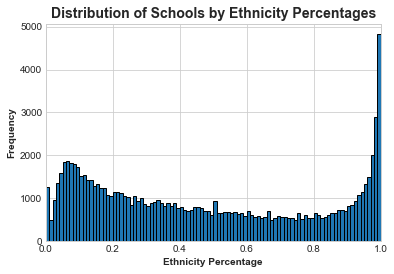

In [30]:
crdc_1516_cleaned.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

** Add Ethnicity Percentage Quintile **

In [31]:
def eth_grouper(pct):
    if pct <= .20:
        return 1
    elif .20 < pct <= .4:
        return 2
    elif .4 < pct <= 0.6:
        return 3
    elif .6 < pct <= .8:
        return 4
    return 5
    
crdc_1516_cleaned['eth_quintile'] = crdc_1516_cleaned['pct_eth'].apply(lambda pct: eth_grouper(pct))

# <font color = green> Filter non-Yes Schools </font>

In [91]:
def have_gr9_or_younger(df):
    """Calculates the number of schools in a given DataFrame (df) offer grades of 8th or younger (i.e. non-high school grades)"""
    count = 0
    for index, row in df.iterrows():
        if row.SCH_GRADE_G08 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G07 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G06 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G05 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G04 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G03 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G02 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G01 == 'Yes':
            count += 1
        elif row.SCH_GRADE_KG == 'Yes':
            count += 1
        elif row.SCH_GRADE_PS == 'Yes':
            count += 1
    return round(count / len(df),3)

**DE**

In [33]:
crdc_1516_deYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_DUAL_IND == 'Yes']

In [34]:
len(crdc_1516_deYes)

14361

In [92]:
"""What portion of schools that offer DE have grades of 8th or younger?"""
have_gr9_or_younger(crdc_1516_deYes)

0.276

In [36]:
de_total_enrollment = crdc_1516_deYes['de_total_enrollment'].sum()
display(de_total_enrollment)
crdc_1516_cleaned['de_total_enrollment'].sum()

1180054

1180054

** AP **

In [37]:
crdc_1516_apYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_APENR_IND == 'Yes']

In [38]:
len(crdc_1516_apYes)

13421

In [39]:
"""What portion of schools that offer AP have grades of 8th or younger?"""
have_gr9_or_younger(crdc_1516_apYes)

0.204

In [40]:
ap_total_enrollment = crdc_1516_apYes['ap_total_enrollment'].sum()
display(ap_total_enrollment)
crdc_1516_cleaned['ap_total_enrollment'].sum()

2808786

2808786

# <font color = green> Analysis </font>

** Total Enrollment in all schools **

In [41]:
crdc_1516_cleaned['total_enrollment'].sum()

50574476

**Total Enrollment in DE-offering schools**

In [42]:
deOffering_total_enrollment = crdc_1516_deYes['total_enrollment'].sum()
deOffering_total_enrollment

11691182

**Total Enrollment in AP-offering schools**

In [43]:
apOffering_total_enrollment = crdc_1516_apYes['total_enrollment'].sum()
apOffering_total_enrollment

13840827

## By Gender

** Total **

In [44]:
print('Male:', crdc_1516_cleaned['TOT_ENR_M'].sum())
print('Female: ', crdc_1516_cleaned['TOT_ENR_F'].sum())

Male: 25995405
Female:  24579071


** DE-enrolled **

In [45]:
total_dualEnr_m = crdc_1516_deYes['TOT_DUALENR_M'].sum()
total_dualEnr_f = crdc_1516_deYes['TOT_DUALENR_F'].sum()
de_pct_m = round(total_dualEnr_m / (de_total_enrollment), 3)
de_pct_f = round(total_dualEnr_f / (de_total_enrollment), 3)
print('Male:', total_dualEnr_m, ' (', de_pct_m, ')')
print('Female: ', total_dualEnr_f, ' (', de_pct_f, ')')

Male: 536812  ( 0.455 )
Female:  643242  ( 0.545 )


** AP-enrolled **

In [46]:
total_apEnr_m = crdc_1516_apYes['TOT_APENR_M'].sum()
total_apEnr_f = crdc_1516_apYes['TOT_APENR_F'].sum()
ap_pct_m = round(total_apEnr_m / (ap_total_enrollment), 3)
ap_pct_f = round(total_apEnr_f / (ap_total_enrollment), 3)
print('Male:', total_apEnr_m, ' (', ap_pct_m, ')')
print('Female: ', total_apEnr_f, ' (', ap_pct_f, ')')

Male: 1229700  ( 0.438 )
Female:  1579086  ( 0.562 )


**Totals in DE-Offering Schools**

In [47]:
total_enr_deOffering_m = crdc_1516_deYes['TOT_ENR_M'].sum()
total_enr_deOffering_f = crdc_1516_deYes['TOT_ENR_F'].sum()
deOffering_pct_m = round(total_enr_deOffering_m / (deOffering_total_enrollment), 3)
deOffering_pct_f = round(total_enr_deOffering_f / (deOffering_total_enrollment), 3)
print('Male:', total_enr_deOffering_m, ' (', deOffering_pct_m, ')')
print('Female: ', total_enr_deOffering_f, ' (', deOffering_pct_f, ')')

Male: 5956484  ( 0.509 )
Female:  5734698  ( 0.491 )


**Totals in AP-Offering Schools**

In [48]:
total_enr_apOffering_m = crdc_1516_apYes['TOT_ENR_M'].sum()
total_enr_apOffering_f = crdc_1516_apYes['TOT_ENR_F'].sum()
apOffering_pct_m = round(total_enr_apOffering_m / (apOffering_total_enrollment), 3)
apOffering_pct_f = round(total_enr_apOffering_f / (apOffering_total_enrollment), 3)
print('Male:', total_enr_apOffering_m, ' (', apOffering_pct_m, ')')
print('Female: ', total_enr_apOffering_f, ' (', apOffering_pct_f, ')')

Male: 7038270  ( 0.509 )
Female:  6802557  ( 0.491 )


**Visualizing the differences**

In [158]:
de_gender_stats = pd.DataFrame([[deOffering_pct_m / deOffering_pct_f], [de_pct_m / de_pct_f]], 
                               index = ['Total Enrollment', 'DE Enrollment'],
                                columns = ['M/F_Ratio'])
de_gender_stats

,M/F_Ratio
Total Enrollment,1.036660
DE Enrollment,0.834862


Text(0.5,1,'Male to Female Ratios in DE Enrollment')

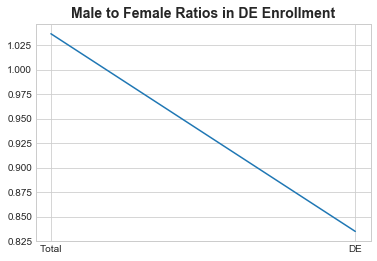

In [180]:
de_gender_stats.plot.line(x = de_gender_stats.index, y = 'M/F_Ratio')
plt.legend([])
plt.xticks(rotation = 0)
plt.xticks([0, 1], ['Total', 'DE'])
plt.title("Male to Female Ratios in DE Enrollment")

In [49]:
print('Females make up ' + str(apOffering_pct_f * 100) + '% ' + 
      'of the total enrollment of schools that offer AP-courses, but make up ' + str(ap_pct_f * 100) + '% ' +
      'of the total AP enrollment.')

Females make up 49.1% of the total enrollment of schools that offer AP-courses, but make up 56.2% of the total AP enrollment.


## By Race

** DE **

In [50]:
total_dualEnr_hi = crdc_1516_deYes['de_hi_enrollment'].sum()
total_dualEnr_am = crdc_1516_deYes['de_am_enrollment'].sum()
total_dualEnr_as = crdc_1516_deYes['de_as_enrollment'].sum()
total_dualEnr_bl = crdc_1516_deYes['de_bl_enrollment'].sum()
total_dualEnr_hp = crdc_1516_deYes['de_hp_enrollment'].sum()
total_dualEnr_tr = crdc_1516_deYes['de_tr_enrollment'].sum()
total_dualEnr_wh = crdc_1516_deYes['de_white_enrollment'].sum()

de_pct_hi = round(total_dualEnr_hi / (de_total_enrollment), 3)
de_pct_am = round(total_dualEnr_am / (de_total_enrollment), 3)
de_pct_as = round(total_dualEnr_as / (de_total_enrollment), 3)
de_pct_bl = round(total_dualEnr_bl / (de_total_enrollment), 3)
de_pct_hp = round(total_dualEnr_hp / (de_total_enrollment), 3)
de_pct_tr = round(total_dualEnr_tr / (de_total_enrollment), 3)
de_pct_wh = round(total_dualEnr_wh / (de_total_enrollment), 3)


print('Hispanic:', total_dualEnr_hi, ' (', de_pct_hi, ')')
print('American Indian/Alaska Native:', total_dualEnr_am, ' (', de_pct_am, ')')
print('Asian:', total_dualEnr_as, ' (', de_pct_as, ')')
print('Black:', total_dualEnr_bl, ' (', de_pct_bl, ')')
print('Native Hawaiian/Pacific Islander:', total_dualEnr_hp, ' (', de_pct_hp, ')')
print('Two or More Races:', total_dualEnr_tr, ' (', de_pct_tr, ')')
print('White:', total_dualEnr_wh, ' (', de_pct_wh, ')')


Hispanic: 199014  ( 0.169 )
American Indian/Alaska Native: 11675  ( 0.01 )
Asian: 59970  ( 0.051 )
Black: 104655  ( 0.089 )
Native Hawaiian/Pacific Islander: 4246  ( 0.004 )
Two or More Races: 31956  ( 0.027 )
White: 768538  ( 0.651 )


** AP **

In [51]:
total_apEnr_hi = crdc_1516_apYes['ap_hi_enrollment'].sum()
total_apEnr_am = crdc_1516_apYes['ap_am_enrollment'].sum()
total_apEnr_as = crdc_1516_apYes['ap_as_enrollment'].sum()
total_apEnr_bl = crdc_1516_apYes['ap_bl_enrollment'].sum()
total_apEnr_hp = crdc_1516_apYes['ap_hp_enrollment'].sum()
total_apEnr_tr = crdc_1516_apYes['ap_tr_enrollment'].sum()
total_apEnr_wh = crdc_1516_apYes['ap_white_enrollment'].sum()

ap_pct_hi = round(total_apEnr_hi / (ap_total_enrollment), 3)
ap_pct_am = round(total_apEnr_am / (ap_total_enrollment), 3)
ap_pct_as = round(total_apEnr_as / (ap_total_enrollment), 3)
ap_pct_bl = round(total_apEnr_bl / (ap_total_enrollment), 3)
ap_pct_hp = round(total_apEnr_hp / (ap_total_enrollment), 3)
ap_pct_tr = round(total_apEnr_tr / (ap_total_enrollment), 3)
ap_pct_wh = round(total_apEnr_wh / (ap_total_enrollment), 3)


print('Hispanic:', total_apEnr_hi, ' (', ap_pct_hi, ')')
print('American Indian/Alaska Native:', total_apEnr_am, ' (', ap_pct_am, ')')
print('Asian:', total_apEnr_as, ' (', ap_pct_as, ')')
print('Black:', total_apEnr_bl, ' (', ap_pct_bl, ')')
print('Native Hawaiian/Pacific Islanapr:', total_apEnr_hp, ' (', ap_pct_hp, ')')
print('Two or More Races:', total_apEnr_tr, ' (', ap_pct_tr, ')')
print('White:', total_apEnr_wh, ' (', ap_pct_wh, ')')


Hispanic: 600303  ( 0.214 )
American Indian/Alaska Native: 17674  ( 0.006 )
Asian: 300185  ( 0.107 )
Black: 264958  ( 0.094 )
Native Hawaiian/Pacific Islanapr: 10056  ( 0.004 )
Two or More Races: 81973  ( 0.029 )
White: 1533637  ( 0.546 )


**Totals in DE-Offering Schools**

In [52]:
total_enr_deOffering_hi = crdc_1516_deYes['total_hi_enrollment'].sum()
total_enr_deOffering_am = crdc_1516_deYes['total_am_enrollment'].sum()
total_enr_deOffering_as = crdc_1516_deYes['total_as_enrollment'].sum()
total_enr_deOffering_bl = crdc_1516_deYes['total_bl_enrollment'].sum()
total_enr_deOffering_hp = crdc_1516_deYes['total_hp_enrollment'].sum()
total_enr_deOffering_tr = crdc_1516_deYes['total_tr_enrollment'].sum()
total_enr_deOffering_wh = crdc_1516_deYes['total_white_enrollment'].sum()

deOffering_pct_hi = round(total_enr_deOffering_hi / (deOffering_total_enrollment), 3)
deOffering_pct_am = round(total_enr_deOffering_am / (deOffering_total_enrollment), 3)
deOffering_pct_as = round(total_enr_deOffering_as / (deOffering_total_enrollment), 3)
deOffering_pct_bl = round(total_enr_deOffering_bl / (deOffering_total_enrollment), 3)
deOffering_pct_hp = round(total_enr_deOffering_hp / (deOffering_total_enrollment), 3)
deOffering_pct_tr = round(total_enr_deOffering_tr / (deOffering_total_enrollment), 3)
deOffering_pct_wh = round(total_enr_deOffering_wh / (deOffering_total_enrollment), 3)

print('Hispanic:', total_enr_deOffering_hi, ' (', deOffering_pct_hi, ')')
print('American Indian/Alaska Native:', total_enr_deOffering_am, ' (', deOffering_pct_am, ')')
print('Asian:', total_enr_deOffering_as, ' (', deOffering_pct_as, ')')
print('Black:', total_enr_deOffering_bl, ' (', deOffering_pct_bl, ')')
print('Native Hawaiian/Pacific Islander:', total_enr_deOffering_hp, ' (', deOffering_pct_hp, ')')
print('Two or More Races:', total_enr_deOffering_tr, ' (', deOffering_pct_tr, ')')
print('White:', total_enr_deOffering_wh, ' (', deOffering_pct_wh, ')')

Hispanic: 2460264  ( 0.21 )
American Indian/Alaska Native: 125366  ( 0.011 )
Asian: 515911  ( 0.044 )
Black: 1777223  ( 0.152 )
Native Hawaiian/Pacific Islander: 49060  ( 0.004 )
Two or More Races: 331681  ( 0.028 )
White: 6431677  ( 0.55 )


**Totals in AP-Offering Schools**

In [53]:
total_enr_apOffering_hi = crdc_1516_apYes['total_hi_enrollment'].sum()
total_enr_apOffering_am = crdc_1516_apYes['total_am_enrollment'].sum()
total_enr_apOffering_as = crdc_1516_apYes['total_as_enrollment'].sum()
total_enr_apOffering_bl = crdc_1516_apYes['total_bl_enrollment'].sum()
total_enr_apOffering_hp = crdc_1516_apYes['total_hp_enrollment'].sum()
total_enr_apOffering_tr = crdc_1516_apYes['total_tr_enrollment'].sum()
total_enr_apOffering_wh = crdc_1516_apYes['total_white_enrollment'].sum()

apOffering_pct_hi = round(total_enr_apOffering_hi / (apOffering_total_enrollment), 3)
apOffering_pct_am = round(total_enr_apOffering_am / (apOffering_total_enrollment), 3)
apOffering_pct_as = round(total_enr_apOffering_as / (apOffering_total_enrollment), 3)
apOffering_pct_bl = round(total_enr_apOffering_bl / (apOffering_total_enrollment), 3)
apOffering_pct_hp = round(total_enr_apOffering_hp / (apOffering_total_enrollment), 3)
apOffering_pct_tr = round(total_enr_apOffering_tr / (apOffering_total_enrollment), 3)
apOffering_pct_wh = round(total_enr_apOffering_wh / (apOffering_total_enrollment), 3)

print('Hispanic:', total_enr_apOffering_hi, ' (', apOffering_pct_hi, ')')
print('American Indian/Alaska Native:', total_enr_apOffering_am, ' (', apOffering_pct_am, ')')
print('Asian:', total_enr_apOffering_as, ' (', apOffering_pct_as, ')')
print('Black:', total_enr_apOffering_bl, ' (', apOffering_pct_bl, ')')
print('Native Hawaiian/Pacific Islanapr:', total_enr_apOffering_hp, ' (', apOffering_pct_hp, ')')
print('Two or More Races:', total_enr_apOffering_tr, ' (', apOffering_pct_tr, ')')
print('White:', total_enr_apOffering_wh, ' (', apOffering_pct_wh, ')')

Hispanic: 3367784  ( 0.243 )
American Indian/Alaska Native: 123272  ( 0.009 )
Asian: 751709  ( 0.054 )
Black: 2106157  ( 0.152 )
Native Hawaiian/Pacific Islanapr: 59846  ( 0.004 )
Two or More Races: 396959  ( 0.029 )
White: 7035100  ( 0.508 )


**Visualizing**

In [193]:
de_race_stats = pd.DataFrame([[deOffering_pct_hi, de_pct_hi], [deOffering_pct_am, de_pct_am], 
                              [deOffering_pct_as, de_pct_as], [deOffering_pct_bl, de_pct_bl], [deOffering_pct_hp, de_pct_hp],
                              [deOffering_pct_tr, de_pct_tr], [deOffering_pct_wh, de_pct_wh]], 
                               index = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'],
                                columns = ['Total', 'DE'])
de_race_stats.T

,Hispanic,Native American,Asian,Black,Native Hawaiian,Two or More Races,White
Total,0.210,0.011,0.044,0.152,0.004,0.028,0.550
DE,0.169,0.010,0.051,0.089,0.004,0.027,0.651


/Users/alijahoconnor/Box Sync/OCR/Data_and_Analysis/venv/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Text(0.5,1,'DE Racial Participation Gap')

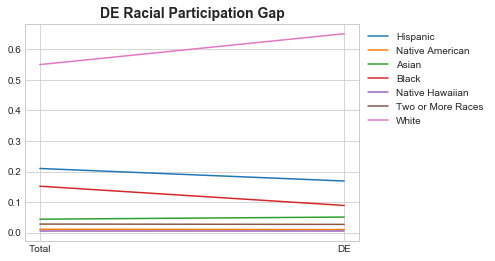

In [199]:
de_race_stats.T.plot.line(x = de_race_stats.T.index, y = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'])
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation = 0)
plt.xticks([0, 1], ['Total', 'DE'])
plt.title("DE Racial Participation Gap")

## By State

** DE **

In [54]:
deOffering_state_total = crdc_1516_deYes.groupby('LEA_STATE')['total_enrollment'].sum().reset_index()
de_state_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['de_total_enrollment'].sum().reset_index()
de_state = de_state_enrollment.merge(deOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [55]:
de_state['de_pct_enrolled'] = round(de_state['de_total_enrollment'] / de_state['total_enrollment'], 3)
de_state.sort_values('de_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

,LEA_STATE,de_total_enrollment,total_enrollment,de_pct_enrolled
0,IN,70807,299366,0.237
1,WA,56171,252466,0.222
2,IA,31517,155635,0.203
3,WI,45968,230186,0.200
4,WY,4863,24565,0.198
5,KS,24423,128212,0.190
6,ID,16486,89312,0.185
7,OR,27049,147728,0.183
8,NY,80188,480307,0.167
9,UT,23198,142938,0.162


In [56]:
de_data = dict(type = 'choropleth',
            locations = de_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = de_state['de_pct_enrolled'])

de_layout = dict(title = 'Percentage of Total Enrollment in DE',
    geo = {'scope':'usa'})

de_choromap = go.Figure(data = [de_data], layout = de_layout)

In [57]:
iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

** AP **

In [58]:
apOffering_state_total = crdc_1516_apYes.groupby('LEA_STATE')['total_enrollment'].sum().reset_index()
ap_state_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['ap_total_enrollment'].sum().reset_index()
ap_state = ap_state_enrollment.merge(apOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [59]:
ap_state['ap_pct_enrolled'] = round(ap_state['ap_total_enrollment'] / ap_state['total_enrollment'], 3)
ap_state.sort_values('ap_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

,LEA_STATE,ap_total_enrollment,total_enrollment,ap_pct_enrolled
0,MD,71123,249564,0.285
1,DC,4183,16767,0.249
2,TX,349188,1418672,0.246
3,FL,195563,802627,0.244
4,CA,425288,1808848,0.235
5,VA,88948,379640,0.234
6,KY,44659,191543,0.233
7,MN,46681,203082,0.230
8,GA,115363,509999,0.226
9,IL,125295,561617,0.223


In [60]:
ap_data = dict(type = 'choropleth',
            locations = ap_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = ap_state['ap_pct_enrolled'])

ap_layout = dict(title = 'Percentage of Total Enrollment in AP',
    geo = {'scope':'usa'})

ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

In [61]:
iplot(ap_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

# By Region

**DE**

In [62]:
deOffering_region_total = crdc_1516_deYes.groupby('region_accred')['total_enrollment'].sum().reset_index()
de_region_enrollment = crdc_1516_deYes.groupby('region_accred')['de_total_enrollment'].sum().reset_index()
de_region = de_region_enrollment.merge(deOffering_region_total, how = 'inner', on = 'region_accred')

In [63]:
de_region['de_pct_enrolled'] = round(de_region['de_total_enrollment'] / de_region['total_enrollment'], 3)
de_region.sort_values('de_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

,region_accred,de_total_enrollment,total_enrollment,de_pct_enrolled
0,NWCCU,130366,747784,0.174
1,HLC,473203,3790713,0.125
2,MSCHE,149369,1392648,0.107
3,SACS,362419,4607622,0.079
4,NEASC,27202,375873,0.072
5,WASC,37495,776542,0.048


Text(0,0.5,'Percent Enrolled in DE')

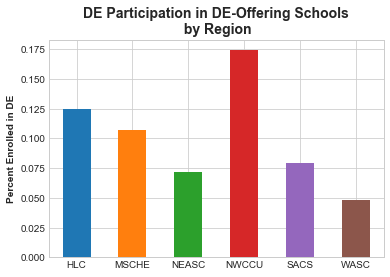

In [202]:
de_region.plot.bar(x='region_accred', y='de_pct_enrolled')
plt.title('DE Participation in DE-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.ylabel('Percent Enrolled in DE')

(-1.1613453302291752,
 1.1593523582938488,
 -1.1675656631988112,
 1.1615959261919064)

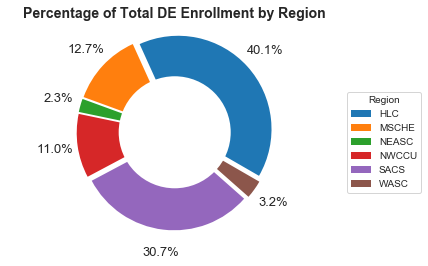

In [135]:
ax = de_region.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(len(de_region))],
                        startangle = -30, pctdistance=1.25, labels = None, fontsize = 13)
plt.legend(labels = de_region.region_accred,
           bbox_to_anchor = (1,0.71), title = 'Region',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Region')

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

**AP**

In [65]:
apOffering_region_total = crdc_1516_apYes.groupby('region_accred')['total_enrollment'].sum().reset_index()
ap_region_enrollment = crdc_1516_apYes.groupby('region_accred')['ap_total_enrollment'].sum().reset_index()
ap_region = ap_region_enrollment.merge(apOffering_region_total, how = 'inner', on = 'region_accred')

In [66]:
ap_region['ap_pct_enrolled'] = round(ap_region['ap_total_enrollment'] / ap_region['total_enrollment'], 3)
ap_region.sort_values('ap_pct_enrolled', ascending = False).reset_index().drop('index', axis = 1)

,region_accred,ap_total_enrollment,total_enrollment,ap_pct_enrolled
0,WASC,431970,1860329,0.232
1,SACS,999657,4697432,0.213
2,MSCHE,395442,2055157,0.192
3,HLC,696590,3706766,0.188
4,NWCCU,170835,908245,0.188
5,NEASC,114292,612898,0.186


Text(0,0.5,'Percent Enrolled in AP')

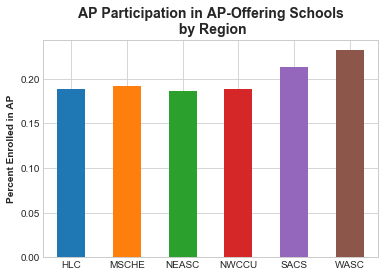

In [205]:
ap_region.plot.bar(x='region_accred', y='ap_pct_enrolled')
plt.title('AP Participation in AP-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.ylabel('Percent Enrolled in AP')

(-1.157400404571002,
 1.1661634859731387,
 -1.1706854424556687,
 1.1767978305589715)

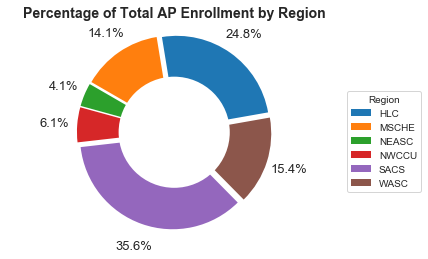

In [136]:
ax = ap_region.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(len(ap_region))],
                        startangle = 10, pctdistance=1.25, labels = None, fontsize = 13)
plt.legend(labels = ap_region.region_accred,
           bbox_to_anchor = (1,0.71), title = 'Region',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Region')

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

# By Ethnicity Percentage of School

**DE**

In [68]:
deOffering_eth_total = crdc_1516_deYes.groupby('eth_quintile')['total_enrollment'].sum().reset_index()
de_eth_enrollment = crdc_1516_deYes.groupby('eth_quintile')['de_total_enrollment'].sum().reset_index()
de_eth = de_eth_enrollment.merge(deOffering_eth_total, how = 'inner', on = 'eth_quintile')

In [69]:
de_eth['de_pct_enrolled'] = round(de_eth['de_total_enrollment'] / de_eth['total_enrollment'], 3)
de_eth

,eth_quintile,de_total_enrollment,total_enrollment,de_pct_enrolled
0,1,415003,3233126,0.128
1,2,291684,2689506,0.108
2,3,179446,2045943,0.088
3,4,131835,1441606,0.091
4,5,162086,2281001,0.071


Text(0,0.5,'Percent Enrolled in DE')

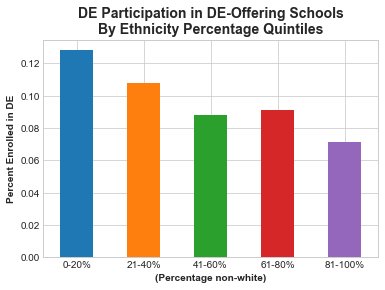

In [210]:
de_eth.plot.bar(x='eth_quintile', y='de_pct_enrolled')
plt.legend([])
plt.title('DE Participation in DE-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in DE')

(-1.1685045430917902,
 1.1543909938576924,
 -1.1607473078495123,
 1.148889415822254)

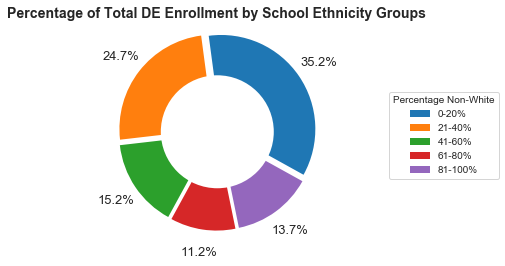

In [137]:
ax = de_eth.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(5)],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Ethnicity Groups')

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

**AP**

In [71]:
apOffering_eth_total = crdc_1516_apYes.groupby('eth_quintile')['total_enrollment'].sum().reset_index()
ap_eth_enrollment = crdc_1516_apYes.groupby('eth_quintile')['ap_total_enrollment'].sum().reset_index()
ap_eth = ap_eth_enrollment.merge(apOffering_eth_total, how = 'inner', on = 'eth_quintile')

In [72]:
ap_eth['ap_pct_enrolled'] = round(ap_eth['ap_total_enrollment'] / ap_eth['total_enrollment'], 3)
ap_eth

,eth_quintile,ap_total_enrollment,total_enrollment,ap_pct_enrolled
0,1,571383,3229567,0.177
1,2,656437,3006253,0.218
2,3,564997,2473886,0.228
3,4,416520,1907326,0.218
4,5,599449,3223795,0.186


Text(0,0.5,'Percent Enrolled in AP')

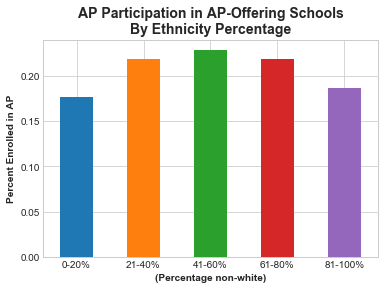

In [211]:
ap_eth.plot.bar(x='eth_quintile', y='ap_pct_enrolled')
plt.legend([])
plt.title('AP Participation in AP-Offering Schools\nBy Ethnicity Percentage')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in AP')

(-1.1745952907558919,
 1.1758915841540927,
 -1.161647128230554,
 1.1658948905648758)

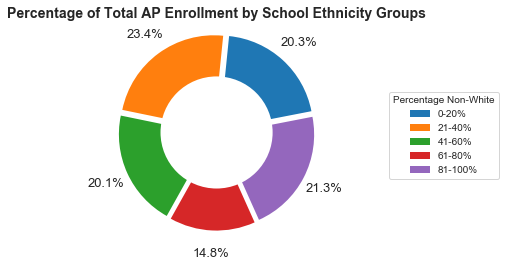

In [138]:
ax = ap_eth.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(5)],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Ethnicity Groups')

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

# By Size

**DE**

In [74]:
deOffering_size_total = crdc_1516_deYes.groupby('size_group')['total_enrollment'].sum().reset_index()
de_size_enrollment = crdc_1516_deYes.groupby('size_group')['de_total_enrollment'].sum().reset_index()
de_size = de_size_enrollment.merge(deOffering_size_total, how = 'inner', on = 'size_group')

In [75]:
de_size['de_pct_enrolled'] = round(de_size['de_total_enrollment'] / de_size['total_enrollment'], 3)
de_size

,size_group,de_total_enrollment,total_enrollment,de_pct_enrolled
0,1,10278,63227,0.163
1,2,241451,1635252,0.148
2,3,346693,3223555,0.108
3,4,581632,6769148,0.086


Text(0,0.5,'Percent Enrolled in DE')

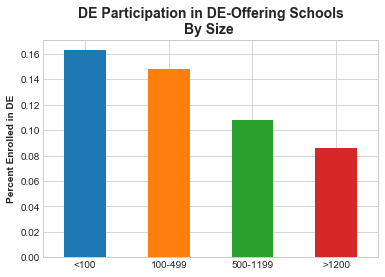

In [213]:
de_size.plot.bar(x = 'size_group', y = 'de_pct_enrolled')
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('DE Participation in DE-Offering Schools\nBy Size ')
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in DE')

(-1.1062005624724052,
 1.1002952648796382,
 -1.1063107949548248,
 1.1095768760172733)

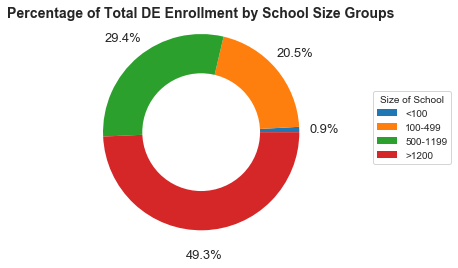

In [139]:
ax = de_size.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', 
                        startangle = 0, pctdistance=1.25, labels = None, fontsize = 13)
plt.legend(labels = ['<100', '100-499', '500-1199', '>1200'], bbox_to_anchor = (1,0.71), title = 'Size of School',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Size Groups')

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

**AP**

In [78]:
apOffering_size_total = crdc_1516_apYes.groupby('size_group')['total_enrollment'].sum().reset_index()
ap_size_enrollment = crdc_1516_apYes.groupby('size_group')['ap_total_enrollment'].sum().reset_index()
ap_size = ap_size_enrollment.merge(apOffering_size_total, how = 'inner', on = 'size_group')

In [79]:
ap_size['ap_pct_enrolled'] = round(ap_size['ap_total_enrollment'] / ap_size['total_enrollment'], 3)
ap_size

,size_group,ap_total_enrollment,total_enrollment,ap_pct_enrolled
0,1,2404,17379,0.138
1,2,169979,1241883,0.137
2,3,637860,3811697,0.167
3,4,1998543,8769868,0.228


Text(0,0.5,'Percent Enrolled in AP')

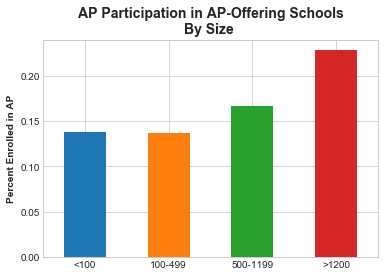

In [214]:
ap_size.plot.bar(x = 'size_group', y = 'ap_pct_enrolled')
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('AP Participation in AP-Offering Schools\nBy Size ')
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in AP')

(-1.100406944667943,
 1.1017475903725091,
 -1.1154844967629434,
 1.1157524250126245)

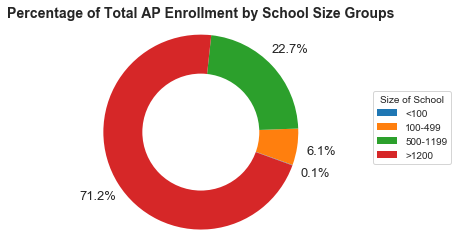

In [140]:
ax = ap_size.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%',
                        startangle = -20, pctdistance=1.25, labels = None, fontsize = 13)
plt.legend(labels = ['<100', '100-499', '500-1199', '>1200'], bbox_to_anchor = (1,0.71), title = 'Size of School',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Size Groups')

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

In [218]:
crdc_1516_deYes.sort_values('de_total_enrollment', ascending = False)[['SCH_NAME', 'LEA_STATE', 'de_total_enrollment']]

,SCH_NAME,LEA_STATE,de_total_enrollment
59112,BROOKLYN TECHNICAL HIGH SCHOOL,NY,3778
2668,Hamilton High School,AZ,2059
58150,FREEPORT HIGH SCHOOL,NY,1756
2681,Perry High School,AZ,1622
91513,Mount Rainier High School,WA,1585
3280,Pinnacle High School,AZ,1546
55306,Passaic County Technical Institute,NJ,1463
91332,Henry M. Jackson High School,WA,1457
31608,Adams High School,IN,1448
91614,Kentridge High School,WA,1441
